In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_path = "/content/new.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(None,
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
 0  5524        1957  Graduation         Single  58138.0        0         0   
 1  2174        1954  Graduation         Single  46344.0        1         1   
 2  4141        1965  Graduation       Together  71613.0        0         0   
 3  6182        1984  Graduation       Together  26646.0        1         0   
 4  5324        1981         PhD        Married  58293.0        1         0   
 
   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
 0  04-09-2012       58       635  ...                  7             0   
 1  08-03-2014       38        11  ...                  5             0   
 2  21-08-2013       26       426  ...                  4             0   
 3  10-02-2014       26        11  ...                  6             0   
 4  19-01-2014       94       173  ...                  5             0   
 
    AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Compl

In [8]:
# Drop rows with missing values in 'Income' column
df = df.dropna()

# Split 'Dt_Customer' into 'day', 'month', and 'year'
df[['day', 'month', 'year']] = df['Dt_Customer'].str.split("-", expand=True).astype(int)

# Drop irrelevant columns
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Education', 'Marital_Status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future reference

# Display updated dataset information
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Marital_Status       2216 non-null   int64  
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   int64 

<ipython-input-8-d6d01a3f69ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['day', 'month', 'year']] = df['Dt_Customer'].str.split("-", expand=True).astype(int)
<ipython-input-8-d6d01a3f69ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['day', 'month', 'year']] = df['Dt_Customer'].str.split("-", expand=True).astype(int)
<ipython-input-8-d6d01a3f69ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

(None,
    Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
 0        1957          2               4  58138.0        0         0       58   
 1        1954          2               4  46344.0        1         1       38   
 2        1965          2               5  71613.0        0         0       26   
 3        1984          2               5  26646.0        1         0       26   
 4        1981          4               3  58293.0        1         0       94   
 
    MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp3  AcceptedCmp4  \
 0       635         88              546  ...             0             0   
 1        11          1                6  ...             0             0   
 2       426         49              127  ...             0             0   
 3        11          4               20  ...             0             0   
 4       173         43              118  ...             0             0   
 
    AcceptedCmp5  AcceptedCmp1  Acc

In [9]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert back to DataFrame for better readability
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Check the first few rows of scaled data
df_scaled.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,day,month,year
0,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,-1.326742,0.726501,-1.500343
1,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-0.871342,-0.993199,1.417393
2,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.608707,0.439884,-0.041475
3,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-0.643643,-1.279816,1.417393
4,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.381007,-1.566433,1.417393


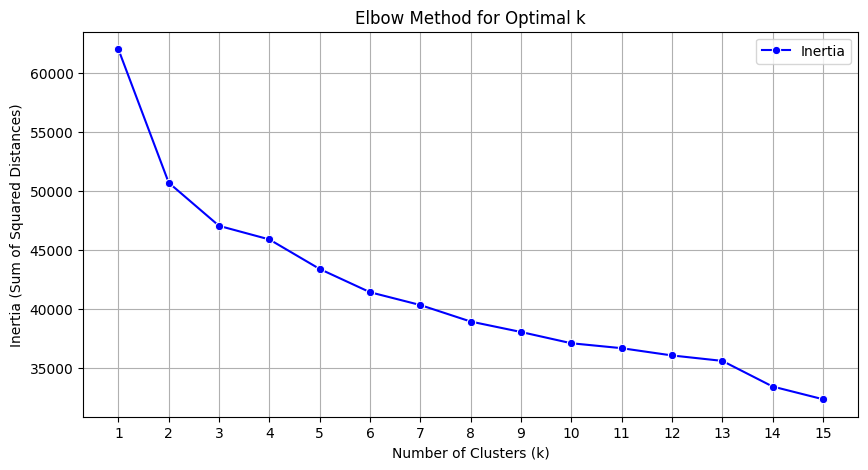

In [10]:
# Import KMeans
from sklearn.cluster import KMeans

# Compute KMeans for different values of k (1 to 15)
inertia = []
k_values = range(1, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, random_state=22)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
sns.lineplot(x=k_values, y=inertia, marker='o', color='b', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

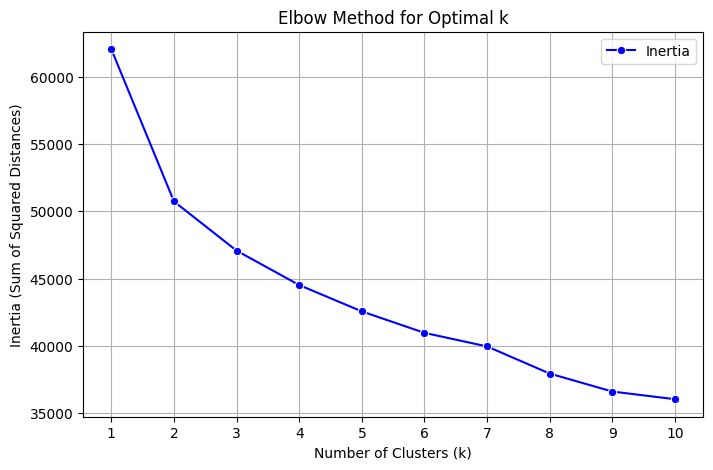

In [11]:
# Reduce the range of k to 1-10 for faster computation
k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=22, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_values, y=inertia, marker='o', color='b', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

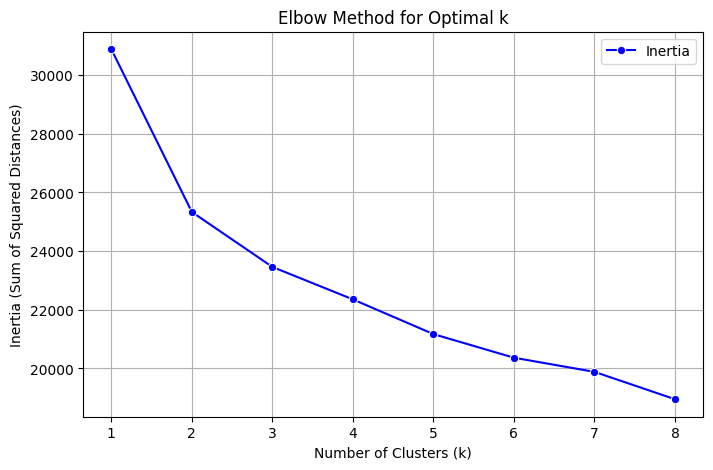

In [12]:
# Sample a subset of the data (50% of rows) to speed up computation
df_sampled = df_scaled.sample(frac=0.5, random_state=22)

# Reduce the range of k to 1-8
k_values = range(1, 9)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=22, n_init=10)
    kmeans.fit(df_sampled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_values, y=inertia, marker='o', color='b', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

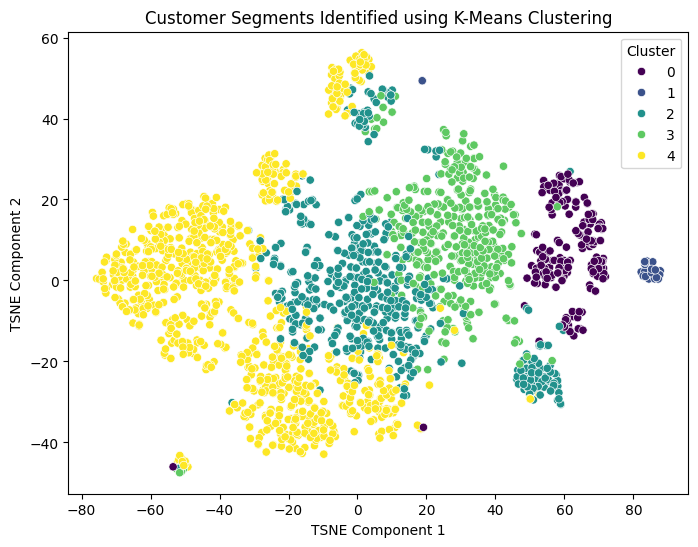

In [13]:
# Apply K-Means clustering with k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, random_state=22, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing Clusters using TSNE (dimensionality reduction for better visualization)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=22)
df_scaled['TSNE_1'], df_scaled['TSNE_2'] = tsne.fit_transform(df_scaled.iloc[:, :-1]).T

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue=df_scaled['Cluster'], palette='viridis', data=df_scaled)
plt.title('Customer Segments Identified using K-Means Clustering')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title="Cluster")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


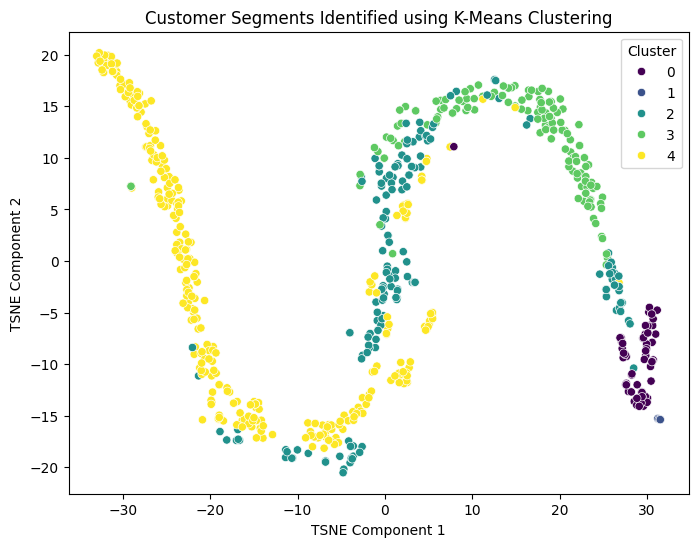

In [14]:
# Sample 30% of data for faster TSNE computation
df_sampled_tsne = df_scaled.sample(frac=0.3, random_state=22)

# Apply TSNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=22, perplexity=30, n_iter=500)
df_sampled_tsne[['TSNE_1', 'TSNE_2']] = tsne.fit_transform(df_sampled_tsne.iloc[:, :-1])

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue=df_sampled_tsne['Cluster'], palette='viridis', data=df_sampled_tsne)
plt.title('Customer Segments Identified using K-Means Clustering')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title="Cluster")
plt.show()

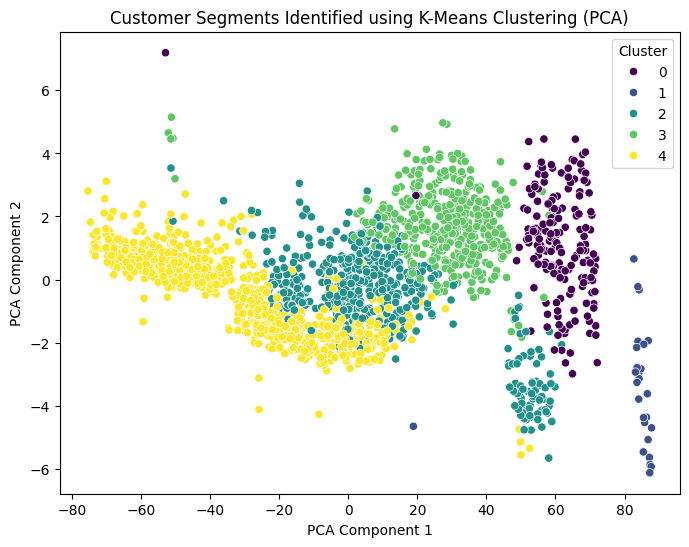

In [15]:
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.iloc[:, :-1])

# Add PCA results to DataFrame
df_scaled['PCA_1'] = pca_result[:, 0]
df_scaled['PCA_2'] = pca_result[:, 1]

# Scatter plot of clusters using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=df_scaled['Cluster'], palette='viridis', data=df_scaled)
plt.title('Customer Segments Identified using K-Means Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')